# Aula 8 - Testes T, Anova e Post-Hoc

## Teste T para Amostras Dependentes

Faremos o teste-t dependentes para a métria de Memória visual, verificando se há diferença entre o controle e as pessoas com concussão na situação de reteste.

1.1 Verifique a aderencia dos dados à distribuição normal - apresente o histograma (com a linha de distribuição normal), o valor p<W e a análise para cada grupo: controle e concussão.
(procedimento pode ser visto aqui: https://youtu.be/dOWZkghcTkM)
1.2 Faça o Teste-t para a métrica 'visual_memory_retest' - apresente a análise e responda:
	1.2.1 Qual a difença média?
	1.2.2 Qual o valor t e o que isso significa?
	1.2.3 Qual a significância do resultado (p-value) e o que isso significa?
	1.2.4 Qual o intervalo de confiânça da diferença média? 
1.3 Faça um teste da homogeneidade da variância (Lavene): setinha vermelha > unequal variances: apresente o resultado (tabela com os testes O'Brien; Brown-Forsythe...)
	1.3.1 Qual o F ratio e o p-value? Qual o significado?

### Teste de Hipótese
Qual o impacto da concussão na memória verbal?
- H0: verbal_memory_baseline - verbal_memory_retest = 0
- HA: verbal_memory_baseline - verbal_memory_retest < 0

- assumir grau de significância alpha = 0.05
- amostras são dependentes: as entradas correspondem a antes e depois de uma mesma amostra

In [23]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pingouin
from scipy.stats import t

In [5]:
# Importar base de dados impact
impact = pd.read_csv('../data/impact.csv')

In [6]:
# Informações gerais da base
impact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   subject                      40 non-null     int64  
 1   condition                    40 non-null     object 
 2   verbal_memory_baseline       40 non-null     int64  
 3   visual_memory_baseline       40 non-null     int64  
 4   visual-motor_speed_baseline  40 non-null     float64
 5   reaction_time_baseline       40 non-null     float64
 6   impulse_control_baseline     40 non-null     int64  
 7   total_symptom_baseline       40 non-null     int64  
 8   verbal_memory_retest         40 non-null     int64  
 9   visual_memory_retest         40 non-null     int64  
 10  visual-motor_speed_retest    40 non-null     float64
 11  reaction_time_retest         40 non-null     float64
 12  impulse_control_retest       40 non-null     int64  
 13  total_symptom_retest  

<AxesSubplot: >

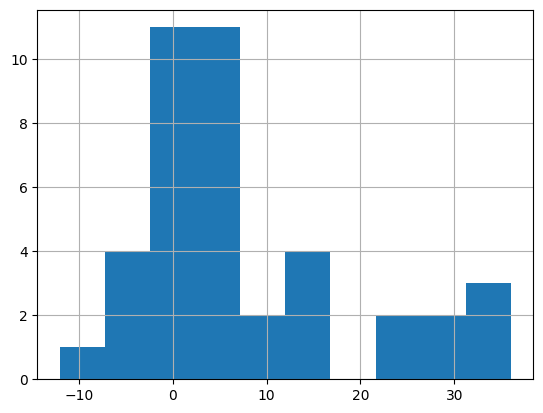

In [9]:
# Teste-t para amostras dependentes, métrica de Memória visual, verificando se há diferença entre o controle e as pessoas com concussão na situação de reteste.
impact['vbm_diff'] = impact['verbal_memory_baseline'] - impact['verbal_memory_retest']
impact['vbm_diff'].hist()

In [19]:
# Cálculo da média das diferenças
xbar_diff = impact['vbm_diff'].mean()
print(xbar_diff)

7.75


In [21]:
# valor de n (tamanho da amostra)
n_diff = len(impact)
print('n_diff: ', n_diff)


# desvio padrão da diferença (antes e depois)
s_diff = impact['vbm_diff'].std()
print('s_diff: ', s_diff)

# t student
t_stat = (xbar_diff-0 / np.sqrt(s_diff**2/n_diff))

# graus de liberdade
degrees_of_freedom = n_diff - 1
print('degrees_of_freedom: ', degrees_of_freedom)

# valor de p
p_value = t.cdf(t_stat, df=n_diff-1)
print('p_value: ', p_value)

n_diff:  40
s_diff:  11.714006518606208
degrees_of_freedom:  39
p_value:  0.9999999989763807


In [24]:
pingouin.ttest(x=impact['vbm_diff'], y=0, alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.184333,39,less,0.999921,"[-inf, 10.87]",0.661601,0.003,3.205744e-09
